## Importations des bibliothèques

In [51]:
#importer les librairies
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

## Les données

In [52]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [53]:
boston = pd.DataFrame(data=data,columns=columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
boston['MEDV'] = target

In [55]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [56]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


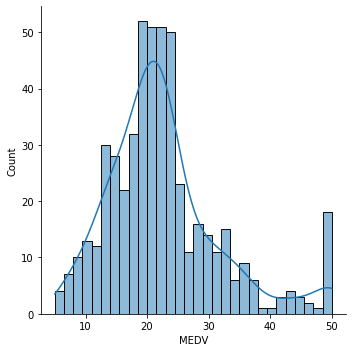

In [57]:
sns.displot(data=boston,x='MEDV', bins=30,kde=True);

## Matrice de corrélation

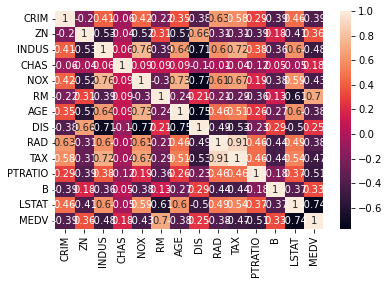

In [58]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True);

## Dispersion des features

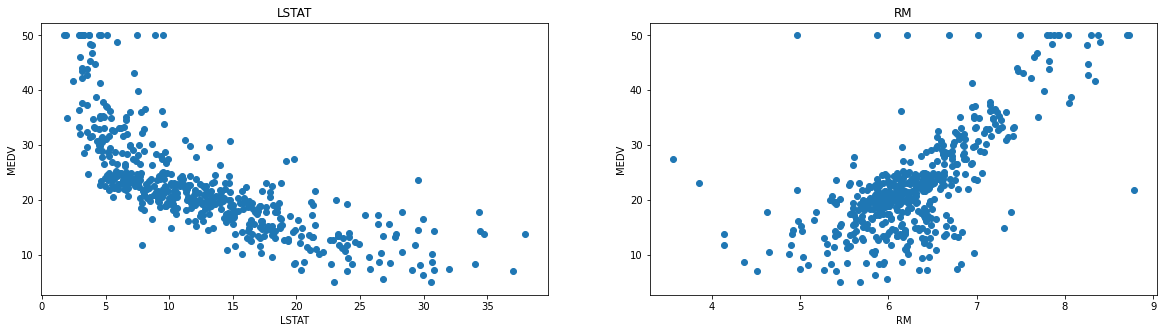

In [59]:
plt.figure(figsize=(20, 5))
features = ['LSTAT', 'RM']
target = boston['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Préparation des variables pour le modèle
Création des variables X et y

In [60]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Fractionnement Entraînement / Tests

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


## Mise à l’échelle des données

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
scaler.fit(X_train)

StandardScaler()

In [64]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Notre modèle de régression linéaire

In [65]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [66]:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [67]:
# évaluation du modèle pour l'ensemble d'entraînement
y_train_predict = linear_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)
print("La performance du Modèle pour le set de Training")
print("------------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))
print("\n")

# évaluation du modèle pour le set de test
y_test_predict = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)
print("La performance du Modèle pour le set de Test")
print("--------------------------------------------")
print("l'erreur RMSE est {}".format(rmse))
print('le score R2 est {}'.format(r2))

La performance du Modèle pour le set de Training
------------------------------------------------
l'erreur RMSE est 5.295854554553106
le score R2 est 0.6358519563974279


La performance du Modèle pour le set de Test
--------------------------------------------
l'erreur RMSE est 6.044926081535136
le score R2 est 0.6318650681832954
